In [176]:
import nltk
import string

In [177]:
import pandas as pd
import numpy as np

In [178]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.inspection import permutation_importance

In [179]:
from collections import Counter

In [180]:
from imblearn.under_sampling import RandomUnderSampler

In [181]:
from nltk.stem.snowball import SnowballStemmer
from nltk.tokenize import word_tokenize


# NLP Pipeline 

![](images/pipeline-walkthrough1.png)

Below is a to do list when converting text into vector form: 

**Clean text and Create a Bag of Words (BoW)**
>1. Lowercase the text
2. Tokenize 
3. Strip out punctuation or undesirable text
4. Remove Stopwords 
5. Stemming or Lemmatizing
6. Compute N-Grams
7. Use this to create BoW

**Vectorize BoW**
>8. Term Frequencies
9. Document Frequencies
10. TF-IDF
11. Normalize vectors

Let's go through both what each of these steps are and how to do them in python with the following corpus of comments about data science...
 

In [182]:
#funtion to cut off extra intro paragraphs from beautiful soup scrape

# def trim_fat(string):
#     return string[35:-115]

In [183]:
# function to vectorize the type_of_material series into a y target vector.
def vectorize_type(ser):
    y = ser.copy()
    y.replace({'Op-Ed': 1,'News': 0}, inplace=True)
    return y

In [184]:
#rate of correct predictions out of total predictions
def metrics_(tn, fp, fn, tp):
    accuracy = (tp + tn) / (tn + fn + tp + fp)
    print(f'accuracy = {accuracy}')
    recall = (tp) / (tp + fn)
    print(f'recall = {recall}')
    precision = (tp) / (tp + fp)
    print(f'precision = {precision}')

In [185]:
%%time
_2019 = pd.read_csv('data/drop2019_text_type.csv', index_col='Unnamed: 0')

CPU times: user 1.36 s, sys: 391 ms, total: 1.75 s
Wall time: 1.79 s


In [186]:
%%time
_2019_df = _2019.copy()

CPU times: user 1.72 ms, sys: 748 µs, total: 2.47 ms
Wall time: 2.1 ms


In [187]:
#define X. X is currently pandas series of unsplit strings

X = _2019_df.text

# manual punctuation work

In [191]:
my_lil_punc = '!"#$%&\()*+,-./:;<=>@[\\]^_`{|}~'

In [ ]:
%%time
X.apply(punc_strip)

In [198]:
#function that removes string.punctuation w/out the '?'
def punc_strip(string):
    my_lil_punc_string = '!"#$%&\()*+,-./:;<=>@[\\]^_`{|}~'

    for char in string:
        if char in my_lil_punc_string:  
            string = string.replace(char, "")
            
    return string


In [14]:
# define y as a series of op-ed or news

y = _2019_df.type_of_material

In [15]:
%%time
# vectorize y in to (1, 0) (op-ed, news)

y = vectorize_type(y)

CPU times: user 10.5 ms, sys: 1.81 ms, total: 12.3 ms
Wall time: 11.5 ms


In [16]:
#turn series into list...

corpus = list(X)

# sklearn TfidfVectorizer(stop_words='english', strip_accents='ascii')

In [17]:
# %%time
# #create vectorizer

# vectorizer = TfidfVectorizer(#input='content', 
# #                 encoding='utf-8', 
# #                 decode_error='strict', 
#                  strip_accents=None, 
#                  lowercase=True, 
# #                 preprocessor=None, 
# #                 tokenizer=None, 
# #                 analyzer='word', 
#                  stop_words='english', 
# #                 token_pattern='(?u)\b\w\w+\b', 
# #                 ngram_range=(1, 1), 
# #                 max_df=1.0, 
# #                 min_df=1, 
#                  max_features=None, 
# #                 vocabulary=None, 
# #                 binary=False, 
# #                 dtype=<class 'numpy.float64'>, 
# #                 norm='l2', 
# #                 use_idf=True, 
# #                 smooth_idf=True, 
# #                 sublinear_tf=False
# )
# X = vectorizer.fit_transform(corpus)

In [18]:
# %%time
# feature_names = vectorizer.get_feature_names()

In [19]:
# %%time
# stop_words = vectorizer.get_stop_words()

In [20]:
# feature_names;

In [21]:
# len(feature_names)

In [22]:
# len(stop_words)

# resample class size w/ imbalanced learn

In [23]:
# y.shape

In [24]:
# X.shape

In [25]:
# %%time
# #balance the classes

# from imblearn.under_sampling import RandomUnderSampler
# rus = RandomUnderSampler(random_state=0)

In [26]:
# %%time
# #X, y --> X_resampled, y_resampled
# X_resampled, y_resampled = rus.fit_resample(X, y)


# #return a list of tuples for item, and count of item. in this case 4139 each
# print(sorted(Counter(y_resampled).items()))

In [27]:
# y_resampled.shape

In [28]:
# X_resampled.shape

In [29]:
# %%time
# #test, train, split

# X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, random_state=50)

# Multinomial Naive Bayes/imbalanced learn/TFIDF vectorizer

In [30]:
# %%time

# multinm_clf = MultinomialNB()
# multinm_clf.fit(X_train, y_train)

In [31]:
#multinm_clf.class_count_

In [32]:
#y_pred = multinm_clf.predict(X_test)

In [33]:
# #clf.score = accuracy = 'true'(pos/neg) / total

# multinm_clf.score(X_test, y_test)

In [34]:
#confusion_matrix(y_true = y_test, y_pred = y_pred)

In [35]:
# tn, fp, fn, tp = confusion_matrix(y_true = y_test, y_pred = y_pred).ravel()
# (tn, fp, fn, tp)

In [36]:
# #rate of correct predictions out of total predictions

# accuracy = (tp + tn) / (tn + fn + tp + fp)
# accuracy

In [37]:
# # rate of actual op-ed articles, out of all the actual od-ed articles

# recall = (tp) / (tp + fn)
# recall

In [38]:
# # rate of correct predictions of op-ed articles out of all predictions

# precision = (tp) / (tp + fp)
# precision

In [39]:
# #rate of correct predictions out of total predictions

# accuracy = (tp + tn) / (tn + fn + tp + fp)
# print(f'accuracy = {accuracy}')
# recall = (tp) / (tp + fn)
# print(f'recall = {recall}')
# precision = (tp) / (tp + fp)
# print(f'precision = {precision}')

# random forest classifier

In [40]:
# class sklearn.ensemble.RandomForestClassifier(n_estimators=100, 
#                                               *, 
#                                               criterion='gini', 
#                                               max_depth=None, 
#                                               min_samples_split=2, 
#                                               min_samples_leaf=1, 
#                                               min_weight_fraction_leaf=0.0, 
#                                               max_features='auto', 
#                                               max_leaf_nodes=None, 
#                                               min_impurity_decrease=0.0, 
#                                               min_impurity_split=None, 
#                                               bootstrap=True, 
#                                               oob_score=False, 
#                                               n_jobs=None, 
#                                               random_state=None, 
#                                               verbose=0, 
#                                               warm_start=False, 
#                                               class_weight=None, 
#                                               ccp_alpha=0.0, 
#                                               max_samples=None)

In [41]:
# %%time

# rf_clf = RandomForestClassifier(max_depth=2, random_state=0)

In [42]:
# %%time

# rf_clf.fit(X_train, y_train)

In [43]:
# y_pred = rf_clf.predict(X_test)

In [44]:
# #clf.score = accuracy = 'true'(pos/neg) / total

# rf_clf.score(X_test, y_test)

In [45]:
# confusion_matrix(y_true = y_test, y_pred = y_pred)

In [46]:
# tn, fp, fn, tp = confusion_matrix(y_true = y_test, y_pred = y_pred).ravel()
# (tn, fp, fn, tp)

In [47]:
# #rate of correct predictions out of total predictions

# accuracy = (tp + tn) / (tn + fn + tp + fp)
# accuracy

In [48]:
# # rate of actual op-ed articles, out of all the actual od-ed articles

# recall = (tp) / (tp + fn)
# recall

In [49]:
# # rate of correct predictions of op-ed articles out of all predictions

# precision = (tp) / (tp + fp)
# precision

In [50]:
# #rate of correct predictions out of total predictions

# accuracy = (tp + tn) / (tn + fn + tp + fp)
# print(f'accuracy = {accuracy}')
# recall = (tp) / (tp + fn)
# print(f'recall = {recall}')
# precision = (tp) / (tp + fp)
# print(f'precision = {precision}')

In [51]:
# class sklearn.ensemble.RandomForestClassifier(n_estimators=100, 
#                                               *, 
#                                               criterion='gini', 
#                                               max_depth=None, 
#                                               min_samples_split=2, 
#                                               min_samples_leaf=1, 
#                                               min_weight_fraction_leaf=0.0, 
#                                               max_features='auto', 
#                                               max_leaf_nodes=None, 
#                                               min_impurity_decrease=0.0, 
#                                               min_impurity_split=None, 
#                                               bootstrap=True, 
#                                               oob_score=False, 
#                                               n_jobs=None, 
#                                               random_state=None, 
#                                               verbose=0, 
#                                               warm_start=False, 
#                                               class_weight=None, 
#                                               ccp_alpha=0.0, 
#                                               max_samples=None)

# NLTK 

In [52]:
nltk_2019_df = _2019.copy()

In [53]:
#define X. X is currently pandas series of unsplit strings

X_nltk = nltk_2019_df.text

In [54]:
# define y as a series of op-ed or news

y_nktk = nltk_2019_df.type_of_material

In [55]:
%%time
# vectorize y in to (1, 0) (op-ed, news)

y_nltk = vectorize_type(y_nktk)

CPU times: user 11.9 ms, sys: 1.9 ms, total: 13.8 ms
Wall time: 12.9 ms


In [56]:
#turn series into list...

corpus_nltk = list(X_nltk)

### tokenize w/ nltk

In [57]:
# %%time
# from nltk.tokenize import RegexpTokenizer
# regex_tokenizer = nltk.RegexpTokenizer(r"\w+")
# tokenized_punc = [regex_tokenizer.tokenize(article.lower())for article in corpus_nltk]

In [58]:
# (len(tokenized_punc[0])) #2218

In [59]:
# len(tokenized_punc)

In [60]:
# from nltk.tokenize import word_tokenize

In [61]:
# type(word_tokenize)

In [62]:
# %%time
# tokenized = [word_tokenize(article.lower()) for article in corpus_nltk]

# CPU times: user 4min 46s, sys: 2.39 s, total: 4min 48s
# Wall time: 4min 50s

In [63]:
# #list of list of strings. one list of strings per documents. list are various lengths around 1000

# len(tokenized[0]) #2596

In [64]:
from nltk.corpus import stopwords

## take out stop work via ntlk. does this work against sklearn when i vectorize

In [ ]:
# %%time
# stop = set(stopwords.words('english'))
# tokenized_docs = [[word for word in words if word not in stop]
#             for words in tokenized_punc]

In [66]:
# #hopefully this reduced the number of strings / list

# len(tokenized[1])

In [67]:
# #docs is new tokenized, but with stop words removed

# len(tokenized_docs)

# stemming/lemmatization

In [68]:
# from nltk.stem.porter import PorterStemmer
from nltk.stem.snowball import SnowballStemmer
# from nltk.stem.wordnet import WordNetLemmatizer

In [69]:
# porter = PorterStemmer()
snowball = SnowballStemmer('english')
# wordnet = WordNetLemmatizer()

In [70]:
# %%time
# docs_porter = [[porter.stem(word) for word in words]
#                    for words in docs]
# docs_snowball = [[snowball.stem(word) for word in words]
#                      for words in docs]
# docs_wordnet = [[wordnet.lemmatize(word) for word in words]
#                     for words in docs]

# CPU times: user 14min 59s, sys: 18.4 s, total: 15min 18s
# Wall time: 15min 26s

In [71]:
# %%time
# docs_porter = [[porter.stem(word) for word in words]
#                    for words in docs]

# CPU times: user 7min 16s, sys: 5.21 s, total: 7min 21s
# Wall time: 7min 22s

In [72]:
# %%time
# snowball_stemm = [[snowball.stem(word) for word in words]
#                      for words in tokenized_docs]

# # CPU times: user 5min 5s, sys: 5.98 s, total: 5min 11s
# # Wall time: 5min 13s

In [73]:
# %%time
# docs_wordnet = [[wordnet.lemmatize(word) for word in words]
#                     for words in docs]

# CPU times: user 1min 24s, sys: 4.5 s, total: 1min 28s
# Wall time: 1min 30s

In [74]:
# %%time
# ## Print the stemmed and lemmatized words from the first document
# print("%16s %16s %16s %16s" % ("word", "porter", "snowball", "lemmatizer"))
# for i in range(min(len(docs_porter[0]), len(docs_snowball[0]), len(docs_wordnet[0]))):
#     p, s, w = docs_porter[0][i], docs_snowball[0][i], docs_wordnet[0][i]
#     if len(set((p, s, w))) != 1:
#         print("%16s %16s %16s %16s" % (docs[0][i], p, s, w))
#         print(docs[0][i], w)


In [75]:
#docs and lemmatizer are the same?

# I choose SNOWBALL!!!! to sklearn

In [165]:
(corpus_nltk[0])

"', 'In his essay “The Crack-Up,” F. Scott Fitzgerald wrote, “The test of a first-rate intelligence is the ability to hold two opposed ideas in the mind at the same time, and still retain the ability to function.”', 'On New Year’s Day 1919, the headlines in The New York Times gave a hint of how difficult that would be for Americans, struggling to live up to the shimmering promises they had made to the world during the Great War, which had ended just over a month before.', 'Poles, newly independent but already threatened by their neighbors, were calling on Americans to protect them. Other countries, like Ireland, were on the cusp of independence, but asking for help. A bewildering set of new responsibilities was settling upon a country that had long cherished its freedom from the Old World.', 'Overwhelmingly, Americans longed to get their old lives back. But there was no clear road map to “normalcy,” to use a word that began to gain traction in the chaos of the postwar years. Grammarian

In [158]:
test_line = (corpus_nltk)

In [161]:
type(test_line[0])

str

In [78]:
# snowball = SnowballStemmer('english')
# snowball_tokenized = [snowball.stem(word) for word in word_tokenize(doc.lower())]

In [79]:
%%time


def snowball_tokenize(doc):
    snowball = SnowballStemmer('english')
    return [snowball.stem(word) for word in word_tokenize(doc.lower())]

CPU times: user 16 µs, sys: 0 ns, total: 16 µs
Wall time: 20.3 µs


In [166]:
test_token = snowball_tokenize(corpus_nltk[0])

In [167]:
test_token

["'",
 ',',
 'in',
 'his',
 'essay',
 '“',
 'the',
 'crack-up',
 ',',
 '”',
 'f.',
 'scott',
 'fitzgerald',
 'wrote',
 ',',
 '“',
 'the',
 'test',
 'of',
 'a',
 'first-rat',
 'intellig',
 'is',
 'the',
 'abil',
 'to',
 'hold',
 'two',
 'oppos',
 'idea',
 'in',
 'the',
 'mind',
 'at',
 'the',
 'same',
 'time',
 ',',
 'and',
 'still',
 'retain',
 'the',
 'abil',
 'to',
 'function.',
 '”',
 "'",
 ',',
 'on',
 'new',
 'year',
 '’',
 's',
 'day',
 '1919',
 ',',
 'the',
 'headlin',
 'in',
 'the',
 'new',
 'york',
 'time',
 'gave',
 'a',
 'hint',
 'of',
 'how',
 'difficult',
 'that',
 'would',
 'be',
 'for',
 'american',
 ',',
 'struggl',
 'to',
 'live',
 'up',
 'to',
 'the',
 'shimmer',
 'promis',
 'they',
 'had',
 'made',
 'to',
 'the',
 'world',
 'dure',
 'the',
 'great',
 'war',
 ',',
 'which',
 'had',
 'end',
 'just',
 'over',
 'a',
 'month',
 'befor',
 '.',
 "'",
 ',',
 'pole',
 ',',
 'newli',
 'independ',
 'but',
 'alreadi',
 'threaten',
 'by',
 'their',
 'neighbor',
 ',',
 'were',
 'c

In [ ]:
vectorizer = TfidfVectorizer()

In [80]:
%%time
#create vectorizer

vectorizer = TfidfVectorizer(#input='content', 
#                 encoding='utf-8', 
#                 decode_error='strict', 
                 strip_accents='ascii', 
                 lowercase=True, 
#                 preprocessor=None, 
                 tokenizer=snowball_tokenize, 
#                 analyzer='word', 
                 stop_words='english', 
#                 token_pattern='(?u)\b\w\w+\b', 
#                 ngram_range=(1, 1), 
#                 max_df=1.0, 
#                 min_df=1, 
                 max_features=None, 
#                 vocabulary=None, 
#                 binary=False, 
#                 dtype=<class 'numpy.float64'>, 
#                 norm='l2', 
#                 use_idf=True, 
#                 smooth_idf=True, 
#                 sublinear_tf=False
)

CPU times: user 37 µs, sys: 0 ns, total: 37 µs
Wall time: 40.1 µs


In [92]:
%%time
X_snowball = vectorizer.fit_transform(corpus_nltk)

CPU times: user 10min 47s, sys: 7.02 s, total: 10min 54s
Wall time: 11min


In [93]:
#class sklearn.feature_extraction.text.CountVectorizer(*, 
#                                                       input='content', 
#                                                       encoding='utf-8', 
#                                                       decode_error='strict', 
#                                                       strip_accents=None, 
#                                                       lowercase=True, 
#                                                       preprocessor=None, 
#                                                       tokenizer=None, 
#                                                       stop_words=None, 
#                                                       token_pattern='(?u)\b\w\w+\b', 
#                                                       ngram_range=(1, 1), 
#                                                       analyzer='word', 
#                                                       max_df=1.0, 
#                                                       min_df=1, 
#                                                       max_features=None, 
#                                                       vocabulary=None, 
#                                                       binary=False, 
#                                                       dtype=<class 'numpy.int64'>
#)

In [94]:
count_vectorizer = CountVectorizer(strip_accents='None',
                                   lowercase=True,
                                   tokenizer=snowball_tokenize,
                                   stop_words='english',
                                   max_features=None)

# balance classes

In [124]:
# %%time
# #balance the classes

# from imblearn.under_sampling import RandomUnderSampler
# rus = RandomUnderSampler(random_state=0)

CPU times: user 31 µs, sys: 18 µs, total: 49 µs
Wall time: 52.9 µs


In [125]:
# %%time
# #X, y --> X_resampled, y_resampled
# X_resampled, y_resampled = rus.fit_resample(X_snowball, y_nltk)
# print(sorted(Counter(y_resampled).items()))

[(0, 3957), (1, 3957)]
CPU times: user 19.8 ms, sys: 11.8 ms, total: 31.6 ms
Wall time: 30.7 ms


In [97]:
%%time
#test, train, split

X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, random_state=50)

CPU times: user 14.6 ms, sys: 11.3 ms, total: 25.9 ms
Wall time: 25.2 ms


In [126]:
# %%time

# rf_clf = RandomForestClassifier(max_depth=2, random_state=0)

In [127]:
# %%time

# rf_clf.fit(X_train, y_train)

In [128]:
#y_pred = rf_clf.predict(X_test)

In [129]:
# #clf.score = accuracy = 'true'(pos/neg) / total

# rf_clf.score(X_test, y_test)

In [131]:
# tn, fp, fn, tp = confusion_matrix(y_true = y_test, y_pred = y_pred).ravel()
# (tn, fp, fn, tp)
# metrics_(tn, fp, fn, tp)
# print(f'tn={tn}, fp={fp}, fn={fn}, tp={tp})')
# print(rf_clf.n_features_)
# print(rf_clf.n_classes_)
# print(rf_clf.n_outputs_)
# # what are the actual parametrs set in the function. something specific about the random forest i forgot

In [103]:
nltk_features = vectorizer.get_feature_names()

In [104]:
nltk_stop = vectorizer.get_stop_words()

In [105]:
type(nltk_features)

list

In [106]:
len(nltk_stop)

318

In [107]:
X_snowball.shape

(37728, 234816)

In [109]:
feature_import = rf_clf.feature_importances_

In [110]:
# property feature_importances_
# The impurity-based feature importances.

# The higher, the more important the feature. The importance of a feature is computed as the (normalized) total reduction of the criterion brought by that feature. It is also known as the Gini importance.

# Warning: impurity-based feature importances can be misleading for high cardinality features (many unique values). See sklearn.inspection.permutation_importance as an alternative.

# Returns
# feature_importances_ndarray of shape (n_features,)
# The values of this array sum to 1, unless all trees are single node trees consisting of only the root node, in which case it will be an array of zeros.



In [111]:
# feat_scores = pd.Series(feature_import,
#                            index=nltk_features)
# feat_scores = feat_scores.sort_values()
# ax = feat_scores.plot(kind='barh', figsize=(10,20))
# ax.set_title('"Decrease in Impurity" Importance')
# ax.set_xlabel('Average contribution to the reduction in variance');

In [112]:
# r = permutation_importance(rf_clf, X_test, y_test, n_repeats=30, random_state=0)
# for index in r.importances_mean.argsort()[::-1]:
#     if r.importances_mean[i] - 2 * r.importances_std[i] > 0:
#         print(f"{feature_names[i]:<8}"
#               f"{r.importances_mean[i]:.3f}"
#               f" +/- {r.importances_std[i]:.3f}")

In [123]:
# %%time
# test_x = test_vectorizer.fit_transform(corpus_nltk)

In [117]:
%%time
#balance the classes

from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler(random_state=0)

#X, y --> X_resampled, y_resampled
X_resampled, y_resampled = rus.fit_resample(X_snowball, y_nltk)
print(sorted(Counter(y_resampled).items()))

[(0, 3957), (1, 3957)]
CPU times: user 21.3 ms, sys: 11.6 ms, total: 32.9 ms
Wall time: 32.3 ms


In [118]:
%%time
#test, train, split

X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, random_state=50)

CPU times: user 9.39 ms, sys: 3.44 ms, total: 12.8 ms
Wall time: 11.8 ms


In [132]:
%%time
rf_clf = RandomForestClassifier(max_depth=2, random_state=0)
rf_clf.fit(X_train, y_train)
y_pred = rf_clf.predict(X_test)

CPU times: user 663 ms, sys: 17.5 ms, total: 680 ms
Wall time: 687 ms


In [154]:
%%time
tn, fp, fn, tp = confusion_matrix(y_true = y_test, y_pred = y_pred).ravel()
(tn, fp, fn, tp)
metrics_(tn, fp, fn, tp)
print(f'tn={tn}, fp={fp}, fn={fn}, tp={tp})')
print(rf_clf.n_features_)
print(rf_clf.n_classes_)
print(rf_clf.n_outputs_)
feat_names = vectorizer.get_feature_names()
print(len(feat_names))
feature_import = rf_clf.feature_importances_
print(type(feature_import))
feature_import.shape
# what are the actual parametrs set in the function. something specific about the random forest i forgot

accuracy = 0.7842344618494189
recall = 0.6722772277227723
precision = 0.8761290322580645
tn=873, fp=96, fn=331, tp=679)
234816
2
1
234816
<class 'numpy.ndarray'>
CPU times: user 457 ms, sys: 254 ms, total: 712 ms
Wall time: 814 ms


(234816,)

In [142]:
feat_names = vectorizer.get_feature_names()

In [143]:
type(feature_import)

numpy.ndarray

In [144]:
X_test.shape

(1979, 234816)

In [145]:
y_test.shape

(1979,)

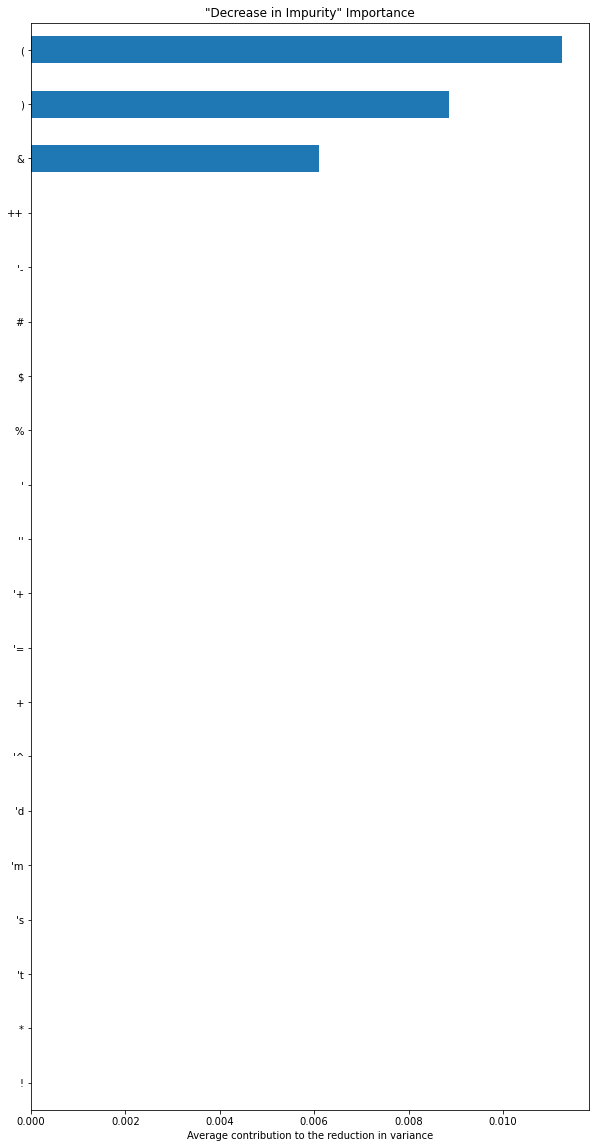

In [148]:
feat_scores = pd.Series(feature_import[:20],
                           index=feat_names[:20])
feat_scores = feat_scores.sort_values()
ax = feat_scores.plot(kind='barh', figsize=(10,20))
ax.set_title('"Decrease in Impurity" Importance')
ax.set_xlabel('Average contribution to the reduction in variance');

In [153]:
%%time
r = permutation_importance(rf_clf, X_test.toarray(), y_test, n_repeats=30, random_state=0)
for i in r.importances_mean.argsort()[::-1]:
    if r.importances_mean[i] - 2 * r.importances_std[i] > 0:
        print(f"{feat_names[i]:<8}"
              f"{r.importances_mean[i]:.3f}"
              f" +/- {r.importances_std[i]:.3f}")

KeyboardInterrupt: 